In [14]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import Counter

In [10]:
sandbox = pd.read_csv("data/easy_load.csv").drop("Unnamed: 0",axis=1)
sandbox.shape

(109009, 50)

In [11]:
sandbox["Timestamp"]  = pd.to_datetime(sandbox["Timestamp"],format="%Y-%m-%d %H:%M:%S")
sandbox.set_index(["Timestamp"],inplace=True)
sandbox.sort_index()
sandbox.head(5)

,AI552051.754,AI552051.754_ALM,BACT.552051,BCMPLT.552051,CYCLE.552051,FAL552051.754,FI552051_718,FIC552051_718,FQI552051.718,HV552051.331,...,SSOALM.552051,TIC552051.616,VI552051.748,VI552051.748_ALM,WI552051.674,WI552051.675,ZS552051.737,ZS552051.740,ZS552051_753,labels
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-01 00:00:00,0.0851304903626442,Normal,Active,Active,0,off,0.0120094,12.0093,208.417,No Data,...,Normal,18.4833,0.838046,Normal,103.945,3726.58,No Data,No Data,No Data,0
2015-04-01 00:10:00,0.08541367948055267,Normal,Active,Active,0,off,0.0120094,12.0093,208.455,No Data,...,Normal,18.4854,0.353471,Normal,103.945,3726.92,No Data,No Data,No Data,0
2015-04-01 00:20:00,0.08569687604904175,Normal,Active,Active,0,off,0.0120094,12.0093,208.492,No Data,...,Normal,18.4875,0.299794,Normal,103.945,3727.26,No Data,No Data,No Data,0
2015-04-01 00:30:00,0.08598006516695023,Normal,Active,Active,0,off,0.0120094,12.0093,208.53,No Data,...,Normal,18.4896,0.129283,Normal,103.945,3727.6,No Data,No Data,No Data,0
2015-04-01 00:40:00,0.0862632542848587,Normal,Active,Active,0,off,0.0120094,12.0093,208.568,No Data,...,Normal,18.4916,0.151732,Normal,103.945,3727.94,No Data,No Data,No Data,0


<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2017-04-27 00:00:00


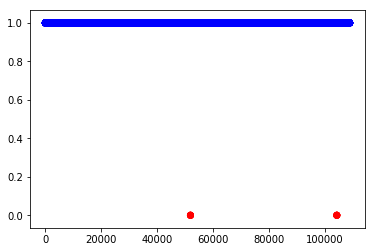

Counter({1: 108996, 0: 12})

In [34]:
def plot_missing_times(table,start,end):
    st = start
    ll = []
    while st < end:
        if st in table:
            ll.append(1)
        else:
            ll.append(0)
        st+=timedelta(minutes=10)
    plt.scatter(np.arange(len(ll)),ll,color=["red" if k==0 else "blue" for k in ll])
    plt.show()
    return ll
    
st = sandbox.index[0]
en = sandbox.index[-1]
print(type(st),en)
Counter(plot_missing_times(sandbox.index,st,en))

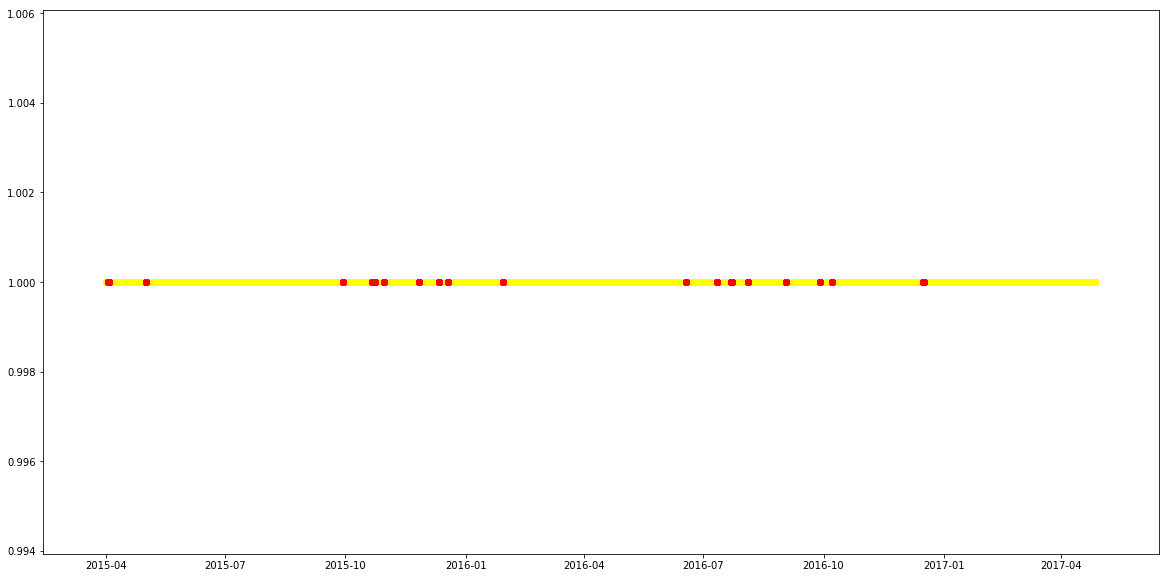

In [36]:
def plot_failures():
    plt.figure(figsize=(20,10))
    plt.scatter(sandbox.index,[1 for _ in range(len(sandbox))],color="yellow")
    fail_piece = sandbox[sandbox.labels > 0]
    plt.scatter(fail_piece.index,[1 for _ in range(len(fail_piece))],color="red")
    plt.show()

plot_failures()

In [ ]:
#     for ind,row in failure.iterrows():
#         st = row["Fstart"]
#         k = []
#         while st < row["Fend"]:
#             k.append(st)
#             st += timedelta(minutes=10)
#         #print("Time ",row["Fend"]-row["Fstart"]," gives ",len(k))
#         plt.plot(k,[1 for _ in range(len(k))],marker="o",color="red")
#         msum+=len(k)
#    print("Total entries ",msum)
    #plt.scatter(datetime.strptime("2016-07-01 00:00:00","%Y-%m-%d %H:%M:%S"),1,marker="*",s=150,color = "green")
    

In [17]:
# Use the visual representation to make a feasible train-test split : 2016-04-30

marked_index = datetime.strptime("2016-07-01 00:00:00","%Y-%m-%d %H:%M:%S")
train = sandbox.loc[:marked_index]
test = sandbox.loc[marked_index:]

print(train.shape)
print(test.shape)



(65809, 49)
(43201, 49)


In [23]:
cat_cols = ["AI552051.754_ALM","BACT.552051","BCMPLT.552051","FAL552051.754","HV552051.331","HV552051.332","LAH552051.670","LAH552051.678","LAH552051.680","M552051.801","M552051.802","M552051.823","M552051.826","M552051.871","MAINT.552051","MODMAN.552051","PARTREC.552051","QCA552051_001","RUN.552051","SIC552051.801_ALM","SSOALM.552051","VI552051.748_ALM","ZS552051.737","ZS552051.740","ZS552051_753"]
non_cat_cols = list(set(list(sandbox.columns))-set(cat_cols))
non_cat_cols.remove("labels")
print(non_cat_cols)

['SI552051.801', 'PHASE.552051', 'WI552051.675', 'CYCLE.552051', 'TIC552051.616', 'SIA552051.801', 'SIC552051.801_SP', 'PIN.552051', 'PI552051.645', 'SIC552051.801_CO', 'SIC552051.801', 'PHTIME.552051', 'PI552051.641', 'WI552051.674', 'FIC552051_718', 'AI552051.754', 'MODSTS.552051', 'VI552051.748', 'PI552051.646', 'FI552051_718', 'PI552051.642', 'FQI552051.718', 'PI552051.651']


In [ ]:
sandbox.head(3)

In [31]:
def plot_features(data,col):
    plt.figure(figsize=(50,10))
    mst = data.index[0]
    plt.plot(data.index,data[col],color="blue")

    fail_piece = data[data.labels > 0][col]
    print(col)
    plt.scatter(fail_piece.index,fail_piece,marker="o",s=100,color="red")
    #plt.scatter(,1,marker="*",s=150,color = "green")
    #plt.vlines(datetime.strptime("2016-07-01 00:00:00","%Y-%m-%d %H:%M:%S"),ymin=np.min(sandbox[col]),ymax=np.max(sandbox[col]),linestyle="dashed",color="green")
    plt.savefig("Test plot "+str(col)+".png")
    plt.show()

for col in non_cat_cols:
    sandbox[col] = pd.to_numeric(sandbox[col], errors='coerce',)


In [32]:
sandbox[non_cat_cols].dtypes

SI552051.801        float64
PHASE.552051        float64
WI552051.675        float64
CYCLE.552051        float64
TIC552051.616       float64
SIA552051.801       float64
SIC552051.801_SP    float64
PIN.552051          float64
PI552051.645        float64
SIC552051.801_CO    float64
SIC552051.801       float64
PHTIME.552051       float64
PI552051.641        float64
WI552051.674        float64
FIC552051_718       float64
AI552051.754        float64
MODSTS.552051       float64
VI552051.748        float64
PI552051.646        float64
FI552051_718        float64
PI552051.642        float64
FQI552051.718       float64
PI552051.651        float64
dtype: object

DatetimeIndex(['2015-08-06 09:40:00', '2015-11-25 15:20:00',
               '2015-11-25 15:30:00'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)


ValueError: could not convert string to float: 'Bad Input'

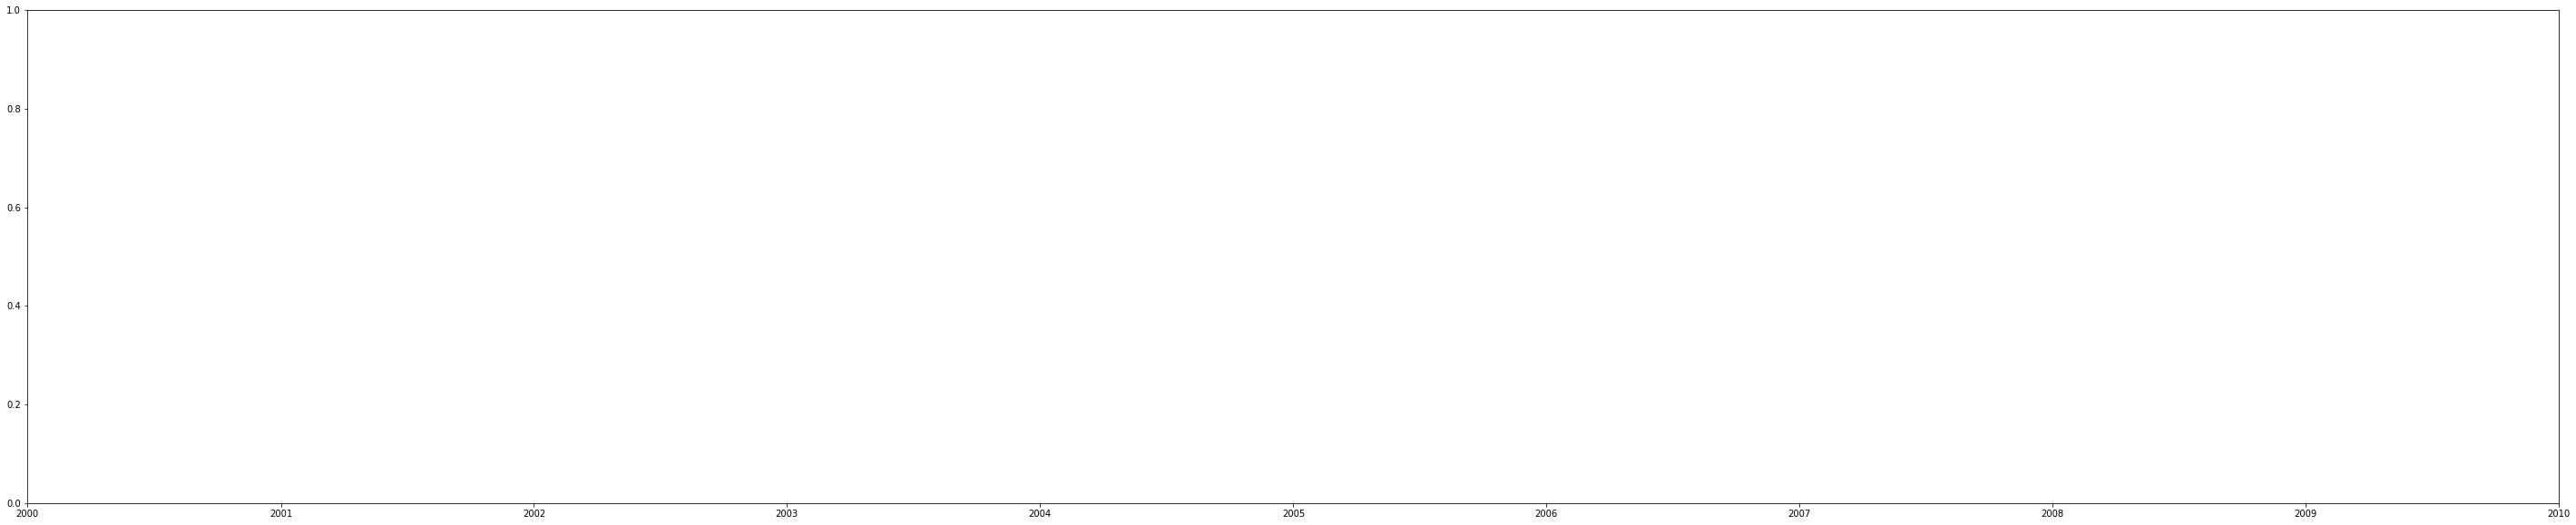

In [33]:

for k in non_cat_cols:
    #print(k)
    print(train[train[k] == "Bad Input"].index)
    plot_features(train,k)

In [ ]:
def mod_bin_search(key):
    low = 0
    high = len(sandbox)-1
    while low >= high:
        ind = (low+high)//2
        if key == sandbox.index[low]:
            return low
        elif key == sandbox.index[high]:
            return high
        elif key == sandbox.index[ind]:
            return ind
        else:
            if sandbox.index[ind] > key:
                if high == ind:
                    return min(low,high)
                high = ind
            else:
                if low == ind:
                    return min(low,high)
                low = ind
    return min(low,high)

In [ ]:
feat_cols = list(sandbox.columns)
feat_cols.remove("labels")

marked_index = datetime.strptime("2016-07-01 00:00:00","%Y-%m-%d %H:%M:%S")
train_data = sandbox.loc[:marked_index][feat_cols]
test_data = sandbox.loc[marked_index:][feat_cols]
train_labels = sandbox.loc[:marked_index]["labels"]
test_labels = sandbox.loc[marked_index:]["labels"]
print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)



In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# create the model
feature_size = 48
embedding_vecor_length = 32
new_model = Sequential()
new_model.add(Embedding(feature_size, embedding_vecor_length, input_length=train_data.shape[1]))
new_model.add(LSTM(32))
new_model.add(Dense(1, activation='sigmoid'))
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(new_model.summary())
new_model.fit(train_data.values, train_labels.values, validation_data=(test_data.values, test_labels.values), epochs=3, batch_size=64)